In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('boston summary.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,41.00%,226272.0000,0.50%,1479,0.02,197.4
1,4/1/2005,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,41.00%,227099.6667,0.47%,1235,0.32,198.6
2,5/1/2005,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,41.00%,227927.3333,0.43%,1616,0.42,198.6
3,6/1/2005,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,41.00%,228755.0000,0.40%,1983,0.32,198.8
4,7/1/2005,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,41.00%,229226.6667,0.43%,1632,1.06,198.8
5,8/1/2005,174.917560,5.82,52698,4473.477,4.3,287529.502,1317.6788,41.00%,229698.3333,0.47%,1222,0.93,207.2
6,9/1/2005,173.847772,5.77,52698,4473.477,4.7,287529.502,1317.6788,41.00%,230170.0000,0.50%,1252,1.23,207.2
7,10/1/2005,173.731544,6.07,52698,4473.477,4.2,287529.502,1317.6788,40.00%,231436.3333,0.53%,1235,1.15,203.2
8,11/1/2005,171.911231,6.33,52698,4473.477,4.4,287529.502,1317.6788,40.00%,232702.6667,0.57%,1234,0.94,203.2
9,12/1/2005,171.287894,6.27,52698,4473.477,4.2,287529.502,1317.6788,40.00%,233969.0000,0.60%,1714,0.73,204.9


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,180.049947,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.4,41.0,0.50
1,4/1/2005,179.342073,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.6,41.0,0.47
2,5/1/2005,178.325591,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.6,41.0,0.43
3,6/1/2005,176.495037,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.8,41.0,0.40
4,7/1/2005,175.601666,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.8,41.0,0.43


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,52698,4473.477,4.7,287529.502,1317.6788,226272.0000,1479,0.02,197.400,41.0,0.50
1,5.86,52698,4473.477,4.4,287529.502,1317.6788,227099.6667,1235,0.32,198.600,41.0,0.47
2,5.72,52698,4473.477,4.3,287529.502,1317.6788,227927.3333,1616,0.42,198.600,41.0,0.43
3,5.58,52698,4473.477,4.8,287529.502,1317.6788,228755.0000,1983,0.32,198.800,41.0,0.40
4,5.70,52698,4473.477,4.6,287529.502,1317.6788,229226.6667,1632,1.06,198.800,41.0,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,75012,4841.772,3.4,437795.135,707.3960,239108.0000,757,2.62,243.682,37.0,1.50
138,3.46,75012,4841.772,3.4,437795.135,707.3960,239019.0000,1851,2.83,243.682,37.0,1.50
139,3.47,75012,4841.772,3.1,437795.135,707.3960,239256.3333,915,2.81,243.575,37.0,1.47
140,3.77,75012,4841.772,3.0,437795.135,707.3960,239493.6667,1036,2.70,243.575,37.0,1.43


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930,1.054379,3.3500,3.925000,4.5550,5.927500,6.7600
Personal_Income,142.0,62077.056338,6711.069616,52698.0000,56800.000000,61427.5000,65330.000000,75012.0000
Resident_Population,142.0,4651.793599,117.072362,4473.4770,4566.348000,4633.1915,4746.931000,4841.7720
Unemployment_Rate,142.0,5.443662,1.345782,3.0000,4.400000,5.2500,6.400000,8.6000
GDP,142.0,353947.385683,46577.001693,287529.5020,312220.171000,348896.7985,380467.719000,437795.1350
Crime_Rate,142.0,946.065580,217.262946,706.7935,739.863125,845.2441,1104.447700,1339.4548
Median_Debt,142.0,240406.556338,4211.060577,226272.0000,238266.416650,239866.1667,243823.833325,246863.0000
New_Structures,142.0,869.429577,415.966096,237.0000,566.250000,802.5000,1090.500000,2127.0000
Economic_Conditions_Index,142.0,1.239507,1.758399,-5.2100,0.805000,1.5700,2.330000,4.0200
CPI all items less shelter,142.0,228.085296,14.095946,197.4000,217.169000,231.9900,240.993000,247.1900


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.397550,-1.523131,-0.552587,-1.425980,1.710431,-3.356531,1.465433,-0.693533,-2.176888,0.584811,-1.644578
1,0.972203,-1.397550,-1.523131,-0.775506,-1.425980,1.710431,-3.159985,0.878847,-0.522923,-2.091757,0.584811,-1.669082
2,0.839424,-1.397550,-1.523131,-0.849812,-1.425980,1.710431,-2.963439,1.794787,-0.466053,-2.091757,0.584811,-1.701755
3,0.706644,-1.397550,-1.523131,-0.478281,-1.425980,1.710431,-2.766894,2.677070,-0.522923,-2.077569,0.584811,-1.726260
4,0.820455,-1.397550,-1.523131,-0.626893,-1.425980,1.710431,-2.654887,1.833251,-0.102086,-2.077569,0.584811,-1.701755
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,1.927404,1.622743,-1.518568,1.800196,-1.098529,-0.308368,-0.270285,0.785085,1.106467,-1.721942,-0.827754
138,-1.304019,1.927404,1.622743,-1.518568,1.800196,-1.098529,-0.329503,2.359737,0.904512,1.106467,-1.721942,-0.827754
139,-1.294534,1.927404,1.622743,-1.741487,1.800196,-1.098529,-0.273143,0.109553,0.893138,1.098877,-1.721942,-0.852258
140,-1.010007,1.927404,1.622743,-1.815793,1.800196,-1.098529,-0.216784,0.400442,0.830581,1.098877,-1.721942,-0.884931


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

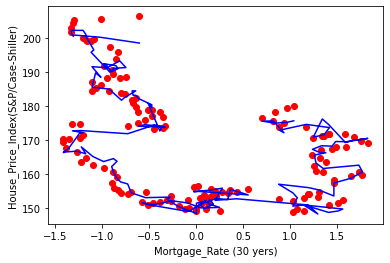

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.1
Accuracy: 98.77 %.


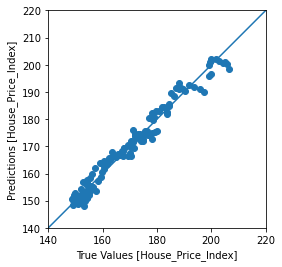

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9728932591093142

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,-1.585704
1,-0.829088
2,-3.039881
3,2.629267
4,18.852733
5,4.476521
6,-1.568898
7,-0.378800
8,1.663234
9,-4.199813


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[175.66155876 175.22501586 174.95176512 175.54664846 175.61507252
 172.14812731 172.88129804 174.60238016 173.66028325 171.5415038
 170.86282455 176.19013133 174.58760674 169.24435082 169.9403653
 170.14583749 170.48010073 169.4954005  169.55306153 168.20058786
 168.30518136 167.25695316 166.34979731 166.24399054 165.56616399
 163.23557499 161.61787773 162.59798401 160.60922215 158.73419824
 157.35615156 153.5245901  155.31806371 155.97469625 156.99562874
 154.45811986 152.99314789 150.53656495 150.93220363 148.69812184
 149.12208021 149.6903329  150.89461049 148.22140421 150.88087375
 152.70373905 152.24675713 155.82781973 155.27082026 154.79335051
 154.87583127 153.85019611 155.47973704 152.46531825 152.80083459
 151.68598075 151.03250593 149.92389957 151.1098133  152.55992838
 151.28990848 150.15256874 150.01963932 151.4825316  152.13517372
 151.29308115 151.0030112  151.54894967 150.98060809 149.13007943
 149.05910032 152.20315044 151.40369872 148.38816335 150.39323022
 152.5592424

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,175.661559
1,175.225016
2,174.951765
3,175.546648
4,175.615073
...,...
137,201.306286
138,200.511747
139,200.891732
140,200.214828


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,...,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404
Resident_Population,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,...,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743
Unemployment_Rate,-0.552587,-0.775506,-0.849812,-0.478281,-0.626893,-0.849812,-0.552587,-0.924118,-0.775506,-0.924118,...,-1.221343,-1.518568,-1.518568,-1.295649,-1.295649,-1.518568,-1.518568,-1.741487,-1.815793,-1.815793
GDP,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,...,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196
Crime_Rate,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,...,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529
Median_Debt,-3.356531,-3.159985,-2.963439,-2.766894,-2.654887,-2.542880,-2.430874,-2.130158,-1.829442,-1.528726,...,0.065885,-0.044776,-0.155437,-0.266098,-0.287233,-0.308368,-0.329503,-0.273143,-0.216784,-0.160424
New_Structures,1.465433,0.878847,1.794787,2.677070,1.833251,0.847594,0.919715,0.878847,0.876443,2.030383,...,0.059068,0.222543,-0.296730,0.407654,0.621614,-0.270285,2.359737,0.109553,0.400442,0.071089
Economic_Conditions_Index,-0.693533,-0.522923,-0.466053,-0.522923,-0.102086,-0.176016,-0.005407,-0.050903,-0.170329,-0.289756,...,0.967069,1.524394,1.313975,1.018252,0.938634,0.785085,0.904512,0.893138,0.830581,0.716841
CPI all items less shelter,-2.176888,-2.091757,-2.091757,-2.077569,-2.077569,-1.481653,-1.481653,-1.765422,-1.765422,-1.644820,...,0.954651,1.042619,1.042619,0.986149,0.986149,1.106467,1.106467,1.098877,1.098877,1.355333


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,-1.397550,...,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404,1.927404
2,Resident_Population,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,-1.523131,...,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743,1.622743
3,Unemployment_Rate,-0.552587,-0.775506,-0.849812,-0.478281,-0.626893,-0.849812,-0.552587,-0.924118,-0.775506,...,-1.221343,-1.518568,-1.518568,-1.295649,-1.295649,-1.518568,-1.518568,-1.741487,-1.815793,-1.815793
4,GDP,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,-1.425980,...,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196,1.800196
5,Crime_Rate,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,1.710431,...,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529,-1.098529
6,Median_Debt,-3.356531,-3.159985,-2.963439,-2.766894,-2.654887,-2.542880,-2.430874,-2.130158,-1.829442,...,0.065885,-0.044776,-0.155437,-0.266098,-0.287233,-0.308368,-0.329503,-0.273143,-0.216784,-0.160424
7,New_Structures,1.465433,0.878847,1.794787,2.677070,1.833251,0.847594,0.919715,0.878847,0.876443,...,0.059068,0.222543,-0.296730,0.407654,0.621614,-0.270285,2.359737,0.109553,0.400442,0.071089
8,Economic_Conditions_Index,-0.693533,-0.522923,-0.466053,-0.522923,-0.102086,-0.176016,-0.005407,-0.050903,-0.170329,...,0.967069,1.524394,1.313975,1.018252,0.938634,0.785085,0.904512,0.893138,0.830581,0.716841
9,CPI all items less shelter,-2.176888,-2.091757,-2.091757,-2.077569,-2.077569,-1.481653,-1.481653,-1.765422,-1.765422,...,0.954651,1.042619,1.042619,0.986149,0.986149,1.106467,1.106467,1.098877,1.098877,1.355333


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),-1.585704
1,Personal_Income,-0.829088
2,Resident_Population,-3.039881
3,Unemployment_Rate,2.629267
4,GDP,18.852733
5,Crime_Rate,4.476521
6,Median_Debt,-1.568898
7,New_Structures,-0.378800
8,Economic_Conditions_Index,1.663234
9,CPI all items less shelter,-4.199813


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

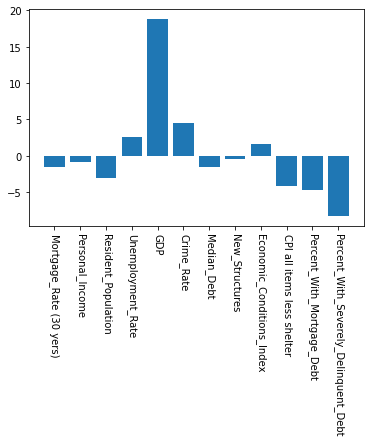

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2017,197.371078,4.15,75012,4841.772,3.8,437795.135,669.2019,37.00%,240081.3333,1.40%,702,1.70,247.190
1,2/1/2017,199.030444,4.17,78923,4873.019,3.8,464426.027,669.2019,37.00%,240431.6667,1.40%,695,1.65,247.615
2,3/1/2017,199.865139,4.20,78923,4873.019,3.5,464426.027,669.2019,37.00%,240782.0000,1.40%,1659,2.57,247.615
3,4/1/2017,199.046078,4.05,78923,4873.019,3.2,464426.027,669.2019,37.00%,240929.0000,1.37%,717,3.28,248.025
4,5/1/2017,199.401630,4.01,78923,4873.019,3.4,464426.027,669.2019,37.00%,241076.0000,1.33%,1662,3.30,248.025
5,6/1/2017,199.987678,3.90,78923,4873.019,3.7,464426.027,669.2019,37.00%,241223.0000,1.30%,1173,3.01,247.032
6,7/1/2017,201.825606,3.97,78923,4873.019,3.7,464426.027,669.2019,36.00%,241480.0000,1.27%,1875,2.95,247.032
7,8/1/2017,202.915818,3.88,78923,4873.019,3.5,464426.027,669.2019,36.00%,241737.0000,1.23%,1032,2.60,250.226
8,9/1/2017,204.398359,3.81,78923,4873.019,3.3,464426.027,669.2019,36.00%,241994.0000,1.20%,1245,2.50,250.226
9,10/1/2017,205.184641,3.90,78923,4873.019,3.0,464426.027,669.2019,36.00%,242478.3333,1.17%,1227,3.15,250.374


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,197.371078,4.15,75012,4841.772,3.8,437795.135,669.2019,240081.3333,702,1.70,247.190,37.0,1.40
1,2/1/2017,199.030444,4.17,78923,4873.019,3.8,464426.027,669.2019,240431.6667,695,1.65,247.615,37.0,1.40
2,3/1/2017,199.865139,4.20,78923,4873.019,3.5,464426.027,669.2019,240782.0000,1659,2.57,247.615,37.0,1.40
3,4/1/2017,199.046078,4.05,78923,4873.019,3.2,464426.027,669.2019,240929.0000,717,3.28,248.025,37.0,1.37
4,5/1/2017,199.401630,4.01,78923,4873.019,3.4,464426.027,669.2019,241076.0000,1662,3.30,248.025,37.0,1.33


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,75012,4841.772,3.8,437795.135,669.2019,240081.3333,702,1.70,247.190,37.0,1.40
1,4.17,78923,4873.019,3.8,464426.027,669.2019,240431.6667,695,1.65,247.615,37.0,1.40
2,4.20,78923,4873.019,3.5,464426.027,669.2019,240782.0000,1659,2.57,247.615,37.0,1.40
3,4.05,78923,4873.019,3.2,464426.027,669.2019,240929.0000,717,3.28,248.025,37.0,1.37
4,4.01,78923,4873.019,3.4,464426.027,669.2019,241076.0000,1662,3.30,248.025,37.0,1.33
5,3.90,78923,4873.019,3.7,464426.027,669.2019,241223.0000,1173,3.01,247.032,37.0,1.30
6,3.97,78923,4873.019,3.7,464426.027,669.2019,241480.0000,1875,2.95,247.032,36.0,1.27
7,3.88,78923,4873.019,3.5,464426.027,669.2019,241737.0000,1032,2.60,250.226,36.0,1.23
8,3.81,78923,4873.019,3.3,464426.027,669.2019,241994.0000,1245,2.50,250.226,36.0,1.20
9,3.90,78923,4873.019,3.0,464426.027,669.2019,242478.3333,1227,3.15,250.374,36.0,1.17


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500,0.125635,3.8100,3.90000,3.9600,4.075000,4.2000
Personal_Income,12.0,78597.083333,1129.008451,75012.0000,78923.00000,78923.0000,78923.000000,78923.0000
Resident_Population,12.0,4870.415083,9.020232,4841.7720,4873.01900,4873.0190,4873.019000,4873.0190
Unemployment_Rate,12.0,3.391667,0.334279,2.9000,3.15000,3.4500,3.700000,3.8000
GDP,12.0,462206.786000,7687.676332,437795.1350,464426.02700,464426.0270,464426.027000,464426.0270
Crime_Rate,12.0,669.201900,0.000000,669.2019,669.20190,669.2019,669.201900,669.2019
Median_Debt,12.0,241551.833333,1018.364323,240081.3333,240892.25000,241351.5000,242115.083325,243447.0000
New_Structures,12.0,1258.750000,478.056506,695.0000,921.00000,1200.0000,1659.750000,2129.0000
Economic_Conditions_Index,12.0,2.633333,0.548126,1.6500,2.45750,2.5850,3.045000,3.3000
CPI all items less shelter,12.0,248.888833,1.879412,247.0320,247.50875,248.0250,250.263000,252.9320


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,1.927404,1.622743,-1.221343,1.800196,-1.274325,-0.077231,-0.402508,0.261882,1.355333,-1.721942,-0.909436
1,-0.630636,2.510173,1.889647,-1.221343,2.371957,-1.274325,0.005963,-0.419336,0.233447,1.385484,-1.721942,-0.909436
2,-0.602184,2.510173,1.889647,-1.444262,2.371957,-1.274325,0.089157,1.898161,0.756650,1.385484,-1.721942,-0.909436
3,-0.744447,2.510173,1.889647,-1.667181,2.371957,-1.274325,0.124065,-0.366447,1.160427,1.414570,-1.721942,-0.933941
4,-0.782384,2.510173,1.889647,-1.518568,2.371957,-1.274325,0.158973,1.905373,1.171801,1.414570,-1.721942,-0.966614
5,-0.886711,2.510173,1.889647,-1.295649,2.371957,-1.274325,0.193881,0.729796,1.006878,1.344124,-1.721942,-0.991118
6,-0.820322,2.510173,1.889647,-1.295649,2.371957,-1.274325,0.254911,2.417434,0.972756,1.344124,-2.298630,-1.015623
7,-0.905680,2.510173,1.889647,-1.444262,2.371957,-1.274325,0.315940,0.390826,0.773711,1.570714,-2.298630,-1.048296
8,-0.972070,2.510173,1.889647,-1.592874,2.371957,-1.274325,0.376970,0.902887,0.716841,1.570714,-2.298630,-1.072801
9,-0.886711,2.510173,1.889647,-1.815793,2.371957,-1.274325,0.491985,0.859614,1.086496,1.581214,-2.298630,-1.097306


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[198.68583701 207.84241852 207.07300702 208.26919335 208.09597832
 209.46384438 211.46455929 210.87070893 210.40516179 210.29459422
 209.73453734 207.86562017]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,198.685837
1,207.842419
2,207.073007
3,208.269193
4,208.095978
5,209.463844
6,211.464559
7,210.870709
8,210.405162
9,210.294594
